<a href="https://colab.research.google.com/github/MimaDalix/Deep-Learning-tensorflow/blob/main/03_intro_to_computer_vision_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is th practice of writing algorithms which can discover patterns in visual data. Such as the cameras of a self-driving car recognizing the car in front. 

## Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

However we've modified it to only use two classes (pizza and steak) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb 

> 🔑 **Note:** We start with a smaller dataset so we can experiment quickly and figure out what works (or better yet what doesnt work) before scaling up.

In [ ]:
import zipfile 

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file 
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2022-10-09 12:11:15--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.128, 108.177.119.128, 108.177.126.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  52.8MB/s    in 2.0s    

2022-10-09 12:11:18 (52.8 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the begining of any  machine learning project is becoming one with the data.
And for a computer vision project...this usually means visualizing many samples of your data.

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os 

# Walk through pizza_steak directoty and list number of file 
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in "{dirpath}".')

There are 2 directories and 0 images in "pizza_steak".
There are 2 directories and 0 images in "pizza_steak/test".
There are 0 directories and 250 images in "pizza_steak/test/steak".
There are 0 directories and 250 images in "pizza_steak/test/pizza".
There are 2 directories and 0 images in "pizza_steak/train".
There are 0 directories and 750 images in "pizza_steak/train/steak".
There are 0 directories and 750 images in "pizza_steak/train/pizza".


In [ ]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Oct  9 12:11 .
drwxr-xr-x 1 root root 4096 Oct  9 12:11 ..
drwxr-xr-x 4 root root 4096 Oct  9 12:11 test
drwxr-xr-x 4 root root 4096 Oct  9 12:11 train


In [ ]:
# Another way to find how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualize our images, first let's get the class names programatically

In [ ]:
# Get the classnames programatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train") 
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))  # Created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [ ]:
# Let's visualize our images 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f'Image shape: {img.shape}')  # show the shape of the image

  return img
 

['967694.jpg']
Image shape: (512, 512, 3)


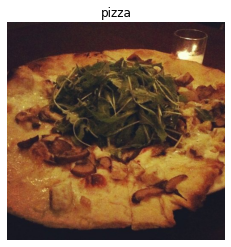

In [ ]:
# View a random image from the training dataset 
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [ ]:
# The images we've imported and plotted are actually giant arrays/tensors of different pixel values 
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[37, 24, 33],
        [40, 27, 36],
        [41, 28, 37],
        ...,
        [27, 31, 32],
        [25, 29, 30],
        [25, 31, 31]],

       [[38, 25, 32],
        [41, 28, 35],
        [42, 29, 36],
        ...,
        [25, 29, 30],
        [23, 27, 28],
        [25, 29, 30]],

       [[42, 29, 36],
        [44, 31, 38],
        [45, 32, 39],
        ...,
        [25, 26, 28],
        [24, 25, 27],
        [26, 27, 29]],

       ...,

       [[23, 23, 33],
        [23, 23, 33],
        [23, 23, 33],
        ...,
        [32, 27, 34],
        [31, 26, 33],
        [31, 26, 33]],

       [[22, 22, 32],
        [22, 22, 32],
        [22, 22, 32],
        ...,
        [31, 26, 33],
        [30, 25, 32],
        [29, 24, 31]],

       [[21, 21, 31],
        [21, 21, 31],
        [22, 22, 32],
        ...,
        [29, 24, 31],
        [29, 24, 31],
        [28, 23, 30]]], dtype=uint8)>

In [ ]:
# View the image shape
img.shape  # returns width, height, colour channels 

(512, 512, 3)

🔑**Note:** As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 & 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also reffered to as **normalize**) their pixel values by dividing the image arrays by 255 (since 255 is the max pixel value).

In [ ]:
# Get all the pixel values between 0 & 1 (scale/normalize) the data
img/255.


array([[[0.14509804, 0.09411765, 0.12941176],
        [0.15686275, 0.10588235, 0.14117647],
        [0.16078431, 0.10980392, 0.14509804],
        ...,
        [0.10588235, 0.12156863, 0.1254902 ],
        [0.09803922, 0.11372549, 0.11764706],
        [0.09803922, 0.12156863, 0.12156863]],

       [[0.14901961, 0.09803922, 0.1254902 ],
        [0.16078431, 0.10980392, 0.1372549 ],
        [0.16470588, 0.11372549, 0.14117647],
        ...,
        [0.09803922, 0.11372549, 0.11764706],
        [0.09019608, 0.10588235, 0.10980392],
        [0.09803922, 0.11372549, 0.11764706]],

       [[0.16470588, 0.11372549, 0.14117647],
        [0.17254902, 0.12156863, 0.14901961],
        [0.17647059, 0.1254902 , 0.15294118],
        ...,
        [0.09803922, 0.10196078, 0.10980392],
        [0.09411765, 0.09803922, 0.10588235],
        [0.10196078, 0.10588235, 0.11372549]],

       ...,

       [[0.09019608, 0.09019608, 0.12941176],
        [0.09019608, 0.09019608, 0.12941176],
        [0.09019608, 0

## An end-to-end exemple 

Let's build a convolutional neural network to find patterns in our images, more specifically, we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images 
* Compile our CNN 
* Fit the CNN to our training data 

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called Scaling/Normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directory 
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches 
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir, 
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3, 
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN 
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model 
history_1 = model_1.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 34s 371ms/step - loss: 0.5456 - accuracy: 0.7000 - val_loss: 0.3744 - val_accuracy: 0.8300
Epoch 2/5
47/47 [==============================] - 13s 276ms/step - loss: 0.4199 - accuracy: 0.8153 - val_loss: 0.3493 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 13s 276ms/step - loss: 0.3867 - accuracy: 0.8353 - val_loss: 0.3300 - val_accuracy: 0.8660
Epoch 4/5
47/47 [==============================] - 14s 296ms/step - loss: 0.3282 - accuracy: 0.8607 - val_loss: 0.3080 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 14s 302ms/step - loss: 0.3112 - accuracy: 0.8713 - val_loss: 0.3214 - val_accuracy: 0.8700


> 🔑**Note:** If the above cell is taking longer than ~10 seconds per epoch, make sure you're using a GPU by going to runtime -> Change Runtime Type -> Hardware Accelerator -> GPU (you may have to run some cells above) 

In [ ]:
# Epoch 1/5
# 47/47 [==============================] - 91s 2s/step - loss: 0.5849 - accuracy: 0.6820 - val_loss: 0.3956 - val_accuracy: 0.8380

In [ ]:
# Get a model summary 
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

⚒ **Exercise:** Go through the CNN explainer website and compare our neural network with theirs.
https://poloclub.github.io/cnn-explainer/ 

## Using the same model as before

Let's replicate the model we've built in a previous section to see if it works with our image  data.

The model we're building is from the [Tensorflow playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,2&seed=0.36984&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) . 

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the modezl to replicate the model from the TensorFlow playground
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model 
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
model_2.fit(train_data, 
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 13s 268ms/step - loss: 0.7295 - accuracy: 0.4927 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 180ms/step - loss: 0.6966 - accuracy: 0.4993 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 12s 248ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 13s 266ms/step - loss: 0.6932 - accuracy: 0.4867 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 210ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


## Exo 

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model with more layers 
model_ex2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

# Compile the model
model_ex2.compile(loss='binary_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

# Fit the model
history_ex2 = model_ex2.fit(train_data, 
                            epochs=10,
                            steps_per_epoch=len(train_data),
                            validation_data=valid_data,
                            validation_steps=len(valid_data))

Epoch 1/10
47/47 [==============================] - 11s 200ms/step - loss: 0.7396 - accuracy: 0.4900 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 2/10
47/47 [==============================] - 8s 179ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 3/10
47/47 [==============================] - 9s 183ms/step - loss: 0.6917 - accuracy: 0.5000 - val_loss: 0.6901 - val_accuracy: 0.5000
Epoch 4/10
47/47 [==============================] - 8s 180ms/step - loss: 0.6892 - accuracy: 0.5000 - val_loss: 0.6870 - val_accuracy: 0.5000
Epoch 5/10
47/47 [==============================] - 13s 271ms/step - loss: 0.6850 - accuracy: 0.5000 - val_loss: 0.6818 - val_accuracy: 0.5000
Epoch 6/10
47/47 [==============================] - 10s 201ms/step - loss: 0.6788 - accuracy: 0.5000 - val_loss: 0.6741 - val_accuracy: 0.5000
Epoch 7/10
47/47 [==============================] - 12s 258ms/step - loss: 0.6678 - accuracy: 0.6660 - val_loss: 0.6586 - val_accuracy: 0.7480
Ep

In [ ]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly ... lets try improving it

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model (same as above but let's step it up a notch)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model 
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_3 = model_3.fit(train_data, 
                        epochs=5, 
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 15s 308ms/step - loss: 4.4895 - accuracy: 0.6300 - val_loss: 2.1399 - val_accuracy: 0.5260
Epoch 2/5
47/47 [==============================] - 9s 198ms/step - loss: 0.8033 - accuracy: 0.7240 - val_loss: 1.1728 - val_accuracy: 0.6160
Epoch 3/5
47/47 [==============================] - 14s 307ms/step - loss: 0.6472 - accuracy: 0.7320 - val_loss: 0.7998 - val_accuracy: 0.6640
Epoch 4/5
47/47 [==============================] - 14s 298ms/step - loss: 0.4951 - accuracy: 0.7867 - val_loss: 0.5742 - val_accuracy: 0.7420
Epoch 5/5
47/47 [==============================] - 14s 290ms/step - loss: 0.5016 - accuracy: 0.7800 - val_loss: 0.6694 - val_accuracy: 0.7240


In [ ]:
# Get a summary of the model_3 
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 150528)            0         
                                                                 
 dense_10 (Dense)            (None, 100)               15052900  
                                                                 
 dense_11 (Dense)            (None, 100)               10100     
                                                                 
 dense_12 (Dense)            (None, 100)               10100     
                                                                 
 dense_13 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


🔑 **Note:** You can think of trainable parameters as **patterns a model can learn from data**. Intuitively you can think more is better. And in a lot of cases, it is. But in this case, the difference here is the two different styles of model we're using. Where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most in an image**. So even though there are less learnable parameters in our convolutional naural network, these are often more helpful in deciphering between different **features** in an image. 

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Binary Classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing & turning our data to batches)
3. Created a model (start with a baseline)
4. Fit the model 
5. Evaluate the model 
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

['1746626.jpg']
Image shape: (354, 512, 3)
['1888911.jpg']
Image shape: (512, 512, 3)


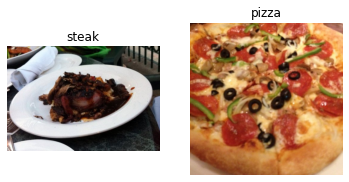

In [ ]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_image = view_random_image('pizza_steak/train/', 'steak')
plt.subplot(1, 2, 2) 
pizza_img = view_random_image("pizza_steak/train/", "pizza")


### 2. Preprocess the data (prepare it for the model)

In [ ]:
# Define directory dataset paths 
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than look at all -10.000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reason:
  1. 10.000 images (or more) might not fit into the memory of your processor (GPU)
  2. Trying to learn the patterns in 10.000 ilages in one hit could result in the model not being able to learn very well.

  Why 32? default value ... yann lecun 

In [ ]:
!nvidia-smi

Sun Oct  9 12:17:52 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P0    31W /  70W |   2394MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Create train ands test data generator and rescale the data 
from tensorflow.keras.preprocessing.image import  ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


In [ ]:
from tensorflow.python.ops.array_ops import batch_gather
# Load in our image data from directories and turn them into batches 
train_data = train_datagen.flow_from_directory(directory=train_dir,     # Target directory of images
                                               target_size=(224, 224),  # Target size of images 
                                               class_mode="binary",     # Type of data you're working with
                                               batch_size=32)     # Size of minibatches to load data into

# valid_data = ...


test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of a train data batch
images, labels = train_data.next()    #  Get the "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [ ]:
# How many batches are there?
len(train_data)

47

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.4039216 , 0.35686275, 0.35686275],
          [0.38823533, 0.34901962, 0.3529412 ],
          [0.37647063, 0.34117648, 0.36078432],
          ...,
          [0.43529415, 0.29803923, 0.28235295],
          [0.40784317, 0.3019608 , 0.27450982],
          [0.3803922 , 0.3019608 , 0.26666668]],
 
         [[0.44705886, 0.3372549 , 0.2901961 ],
          [0.48627454, 0.3803922 , 0.34509805],
          [0.43529415, 0.3529412 , 0.33333334],
          ...,
          [0.60784316, 0.46274513, 0.427451  ],
          [0.60784316, 0.43921572, 0.4156863 ],
          [0.60784316, 0.41960788, 0.41176474]],
 
         [[0.40000004, 0.2392157 , 0.15294118],
          [0.6313726 , 0.48627454, 0.41176474],
          [0.6039216 , 0.47450984, 0.4156863 ],
          ...,
          [0.70980394, 0.5019608 , 0.4784314 ],
          [0.69803923, 0.4784314 , 0.47450984],
          [0.68235296, 0.46274513, 0.4666667 ]],
 
         ...,
 
         [[0.3254902 , 0.23529413, 0.17254902],
          [0.30588

In [ ]:
images[7].shape

(224, 224, 3)

In [ ]:
# View the first batch of labels 
labels

array([1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when begining a machine learning experiment and the as you keep experimenting, you try to beat the baseline.

> 🔑 **Note:** In deep learning, there is almost an infinite amount of architecture you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem) 

In [ ]:
# Make the creating of our model a little easier 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential


In [ ]:
# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10, # filter is the number of sliding windows going across an input (higher=more complex model)
           kernel_size=3, # the size of the sliding window going across an input
           strides=1,   # the size of the step the sliding window takes across an input
           padding='valid',   # If "same", output shape is same as output shape, if 'valid', output shape gets compressed
           activation='relu',
           input_shape=(224, 224, 3)),   # imput layer (specify input shape)
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation="sigmoid")  # output layer (working with binary classification so only 1 output neuron)
])


⚒ **Practice:** Understant what is going on in a Conv2D layer by going through the CNN explainer website

In [ ]:
# Compile the model 
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
# Get a summary of our model 
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_4 (Flatten)         (None, 475240)            0         
                                                                 
 dense_14 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [ ]:
# Check the lenghts of training and testing data 
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model 
history_4 = model_4.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data)
                        #callbacks=[tensorboard_callback]
                        )

Epoch 1/5
47/47 [==============================] - 16s 316ms/step - loss: 1.1021 - accuracy: 0.6407 - val_loss: 0.5321 - val_accuracy: 0.7220
Epoch 2/5
47/47 [==============================] - 15s 323ms/step - loss: 0.4563 - accuracy: 0.8000 - val_loss: 0.3879 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 15s 317ms/step - loss: 0.3288 - accuracy: 0.8647 - val_loss: 0.4011 - val_accuracy: 0.8080
Epoch 4/5
47/47 [==============================] - 10s 211ms/step - loss: 0.1722 - accuracy: 0.9480 - val_loss: 0.4559 - val_accuracy: 0.7960
Epoch 5/5
47/47 [==============================] - 11s 234ms/step - loss: 0.0569 - accuracy: 0.9847 - val_loss: 0.4813 - val_accuracy: 0.8280


In [ ]:
model_1.evaluate(test_data)

16/16 [==============================] - 2s 147ms/step - loss: 0.3214 - accuracy: 0.8700


[0.32135263085365295, 0.8700000047683716]

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

### 5. Evaluating our model

It looks like our model is learning something, let's evaluate it.

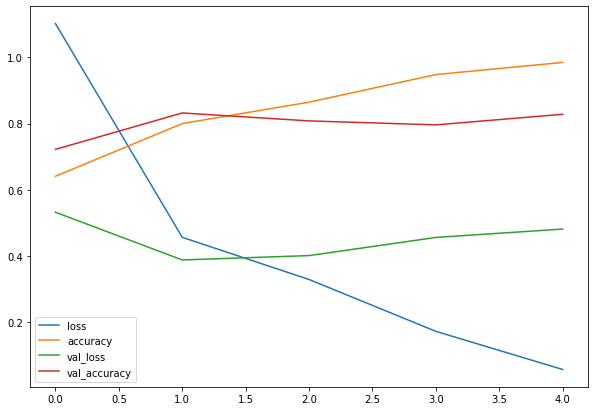

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [28]:
# Plot the validation and training curves separately 
def plot_loss_curves(history):
  """
  Return separate loss curves for training and validation metrics
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))   # How many epochs did we run for ?

  # Plot loss
  
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()

> 🔑 **Note:** When a model's validation loss starts to **increase**, it's likely the model is **overfitting** the training dataset. This means, it's learning the patterns *too well* and thus the model's ability to generalize to unseen data will be diminished.  

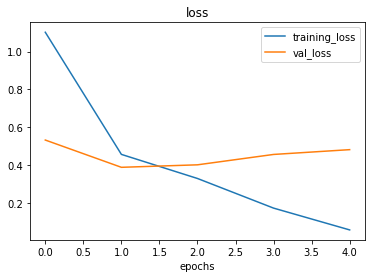

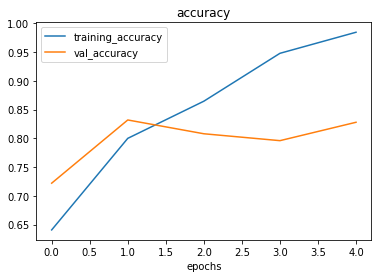

In [ ]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

🔑 **Note:** Ideally the two loss curves (training and validation) will be very similar to each other (training loss and validation loss decreasing at similar rates), when there are large differences your model may be **overfitting**. 

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:
  
  0. Create a baseline
  1. Beat the baseline by overfitting a larger model
  2. Reduce overfitting 

Ways to induce overfitting

* Increase the number of conv layer
* Increase the number of conv filters 
* Add another dense layer to the output of our flattened layer

Reduce overfitting
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data ...

> 🔑 **Note:** Reducing overfitting is also known as **regularization**

In [ ]:
# Create the model (this is going to be our new baseline)

model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])


In [ ]:
# Fit the model 
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 16s 329ms/step - loss: 0.6225 - accuracy: 0.6400 - val_loss: 0.5286 - val_accuracy: 0.7220
Epoch 2/5
47/47 [==============================] - 14s 292ms/step - loss: 0.4891 - accuracy: 0.7600 - val_loss: 0.4693 - val_accuracy: 0.7660
Epoch 3/5
47/47 [==============================] - 15s 331ms/step - loss: 0.4538 - accuracy: 0.7900 - val_loss: 0.3754 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 15s 318ms/step - loss: 0.4173 - accuracy: 0.8240 - val_loss: 0.4011 - val_accuracy: 0.8060
Epoch 5/5
47/47 [==============================] - 14s 302ms/step - loss: 0.3899 - accuracy: 0.8300 - val_loss: 0.3589 - val_accuracy: 0.8440


In [ ]:
# Get a summary with max pooling
model_5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [ ]:
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_4 (Flatten)         (None, 475240)            0         
                                                                 
 dense_14 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_5.evaluate(test_data)

16/16 [==============================] - 3s 212ms/step - loss: 0.3589 - accuracy: 0.8440


[0.35890695452690125, 0.843999981880188]

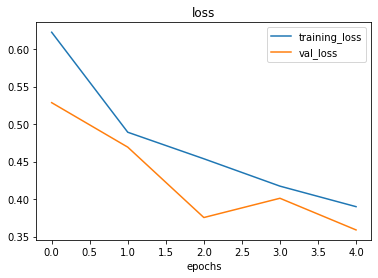

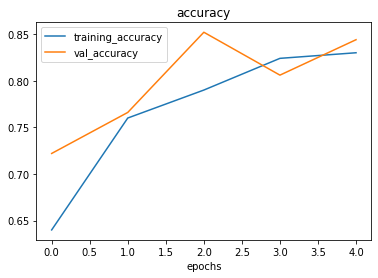

In [ ]:
# Plot loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [ ]:
# Create ImageDataGenerator instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,   # How much you want to rotate an image?
                                             shear_range=0.2,   # how much you want to shear an image?
                                             zoom_range=0.2,  # zoom in randomly on an image 
                                             width_shift_range=0.2,  # move yoyr image around on the x-axis 
                                             height_shift_range=0.2,  # move your image arounf on the y-axis
                                             horizontal_flip=True)  # do you want to flip an image

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset 
test_datagen = ImageDataGenerator(rescale=1/255.)


> 🤔 **Question:** What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generelizable(hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it cropping it or something similar.  
 
Let's write some code to visualize data augmentation..

In [ ]:
# Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir, 
                                                                target_size=(224, 224),
                                                                batch_size=32,
                                                                class_mode='binary',
                                                                shuffle=False)  # For demonstration purposes only

# Create non augmented train data batches 
print('Non-augmented training data:')
train_data = train_datagen.flow_from_directory(train_dir, 
                                                target_size=(224, 224),
                                                batch_size=32,
                                                class_mode='binary',
                                                shuffle=False)

# Create non-augmented test data batches
print('Non-augmented test data:')
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="binary")                                                            

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


> 🔑 **Note:** Data augmentation is usually only performed on the trainig data. Using `ÌmageDataGenerator` built-in data augmentation parameters in our images are left as they are in the directories but are modified as they're loaded into the model.

Finally, let's visualize some augmented data!!!

In [ ]:
# Get sample data batches 
images, labels = train_data.next()
augmented_images, augmented_labels  = train_data_augmented.next()   # note: labels aren't augmented... only data (images)

showing image number: 30


(-0.5, 223.5, 223.5, -0.5)

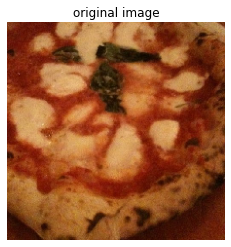

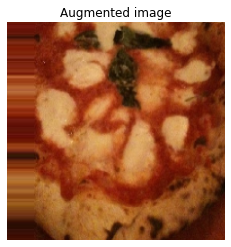

In [ ]:
# Show original image and augmented image
import random 
random_number = random.randint(0, 32)  # our batch size is 32
print(f'showing image number: {random_number}')
plt.imshow(images[random_number])
plt.title(f'original image')
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f'Augmented image')
plt.axis(False)

Now we've seen what augmented training data looks like, let's build a model and see how it learns

In [ ]:
model_5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [ ]:
# Create a model same as (model_5)

# Setting the random seed
tf.random.set_seed(42)

# Create the model 
model_6 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
    ])

# Compile the model 
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented,   # Fitting model 6 on augmented data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data)) 

Epoch 1/5
47/47 [==============================] - 42s 890ms/step - loss: 0.7762 - accuracy: 0.4860 - val_loss: 0.6922 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 30s 648ms/step - loss: 0.6921 - accuracy: 0.5540 - val_loss: 0.6875 - val_accuracy: 0.7200
Epoch 3/5
47/47 [==============================] - 22s 470ms/step - loss: 0.6867 - accuracy: 0.6060 - val_loss: 0.6582 - val_accuracy: 0.7580
Epoch 4/5
47/47 [==============================] - 22s 468ms/step - loss: 0.6768 - accuracy: 0.5793 - val_loss: 0.6406 - val_accuracy: 0.7900
Epoch 5/5
47/47 [==============================] - 23s 482ms/step - loss: 0.6440 - accuracy: 0.6553 - val_loss: 0.5928 - val_accuracy: 0.6980


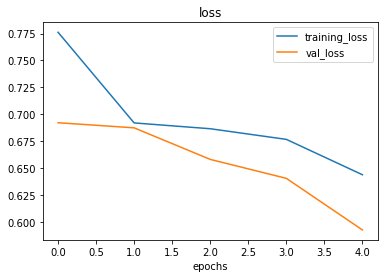

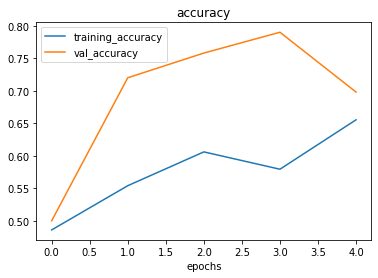

In [ ]:
# Check our model's training curve 
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model (the same as before) and see what happens

In [ ]:
#  Import data and augment it and shuffle it from training directory
print("Augmented and shuffled data:")
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                        target_size=(224, 224),
                                                        batch_size=32,
                                                        class_mode='binary',
                                                        shuffle=True)  # Shuffle data this time 

Augmented and shuffled data:
Found 1500 images belonging to 2 classes.


In [ ]:
# Create new model with augmented and shuffled data

# Set the random seed
tf.random.set_seed(42)

# Create the model 
model_7 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model 
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,  # we're fitting on the data augmented and shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 500ms/step - loss: 0.6277 - accuracy: 0.6360 - val_loss: 0.5546 - val_accuracy: 0.6800
Epoch 2/5
47/47 [==============================] - 28s 608ms/step - loss: 0.5634 - accuracy: 0.7107 - val_loss: 0.4232 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 24s 515ms/step - loss: 0.4874 - accuracy: 0.7760 - val_loss: 0.3381 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 26s 555ms/step - loss: 0.4809 - accuracy: 0.7747 - val_loss: 0.3667 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 21s 459ms/step - loss: 0.4586 - accuracy: 0.7847 - val_loss: 0.3941 - val_accuracy: 0.8240


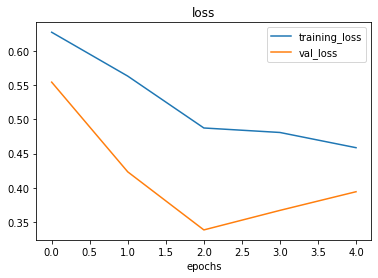

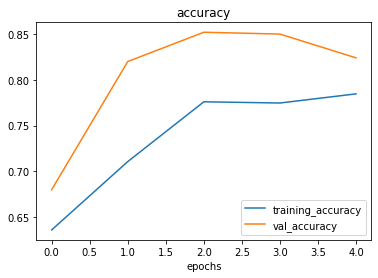

In [ ]:
plot_loss_curves(history_7)

🔑 **Note:** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak)

### Repeat untill satisfied

Since we've already beaten our baseline, there are a few things we can try to continue to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D` / `MaxPool2D`layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate 
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learned and adjust it for our own use case

> ⚒ **Practice:** Recreate the model on the CNN explainer website (same as model_1) and see how it performs on shuffled training data.

### Exo:

In [ ]:
# Recreating the model on the CNN explainer website:

# Setting the random seed
tf.random.set_seed(42)

# Creating the model
model_exo_1 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compiling the model 
model_exo_1.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])


# Fitting the model 
history_exo_1 = model_exo_1.fit(train_data_augmented_shuffled,
                epochs=5,
                steps_per_epoch=len(train_data_augmented_shuffled),
                validation_data=test_data,
                validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 510ms/step - loss: 0.6286 - accuracy: 0.6313 - val_loss: 0.4799 - val_accuracy: 0.7360
Epoch 2/5
47/47 [==============================] - 22s 464ms/step - loss: 0.5022 - accuracy: 0.7573 - val_loss: 0.3756 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 30s 632ms/step - loss: 0.4792 - accuracy: 0.7813 - val_loss: 0.3551 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 22s 467ms/step - loss: 0.4766 - accuracy: 0.7813 - val_loss: 0.4907 - val_accuracy: 0.7100
Epoch 5/5
47/47 [==============================] - 27s 566ms/step - loss: 0.4771 - accuracy: 0.7733 - val_loss: 0.3106 - val_accuracy: 0.8660


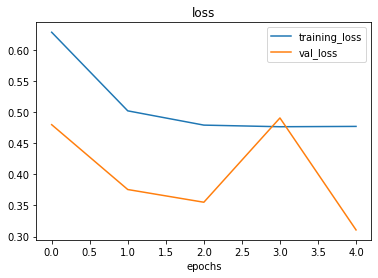

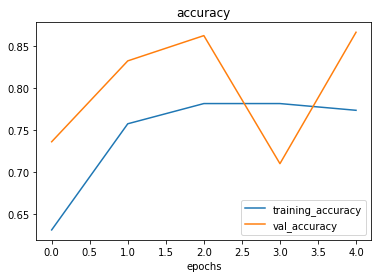

In [ ]:
# Plotting the loss curve
plot_loss_curves(history_exo_1)

In [ ]:
# Exo_2: Plotting for more epochs

# Set the random seed
tf.random.set_seed(42)

# Creating the model
model_exo_2 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compiling the model 
model_exo_2.compile(loss='binary_crossentropy',
                    optimizer=Adam(),
                    metrics=['accuracy']),

# Fit the model 
history_exo_2 = model_exo_2.fit(train_data_augmented_shuffled,
                                epochs=20,
                                steps_per_epoch=len(train_data_augmented_shuffled),
                                validation_data=test_data,
                                validation_steps=len(test_data))

Epoch 1/20
47/47 [==============================] - 24s 497ms/step - loss: 0.6257 - accuracy: 0.6427 - val_loss: 0.4238 - val_accuracy: 0.8260
Epoch 2/20
47/47 [==============================] - 35s 753ms/step - loss: 0.4963 - accuracy: 0.7653 - val_loss: 0.3593 - val_accuracy: 0.8540
Epoch 3/20
47/47 [==============================] - 26s 552ms/step - loss: 0.5166 - accuracy: 0.7567 - val_loss: 0.3765 - val_accuracy: 0.8660
Epoch 4/20
47/47 [==============================] - 29s 610ms/step - loss: 0.4571 - accuracy: 0.7860 - val_loss: 0.3400 - val_accuracy: 0.8680
Epoch 5/20
47/47 [==============================] - 22s 462ms/step - loss: 0.4454 - accuracy: 0.7940 - val_loss: 0.3861 - val_accuracy: 0.8260
Epoch 6/20
47/47 [==============================] - 23s 483ms/step - loss: 0.4324 - accuracy: 0.8127 - val_loss: 0.3201 - val_accuracy: 0.8700
Epoch 7/20
47/47 [==============================] - 23s 489ms/step - loss: 0.4357 - accuracy: 0.7980 - val_loss: 0.2859 - val_accuracy: 0.8780

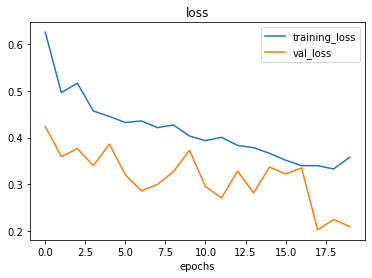

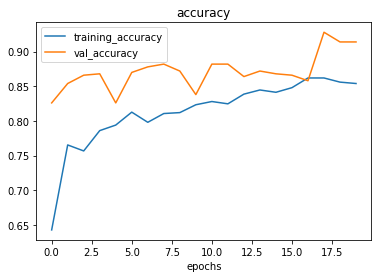

In [ ]:
# Plotting the loss curves 
plot_loss_curves(history_exo_2)

### Making a prediction with our trained model on our own custom data

In [ ]:
# Classes we're working with 
print(class_names)

['pizza' 'steak']


--2022-10-09 12:45:25--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.02s   

2022-10-09 12:45:25 (86.1 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

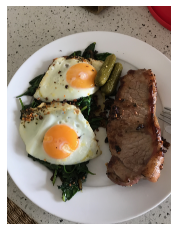

In [ ]:
# View our example image 
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread('03-steak.jpeg')
plt.imshow(steak)
plt.axis(False)

In [ ]:
# Check the shape of our image 
steak.shape

(4032, 3024, 3)

> 🔑 **Note:** When you train a neural network model and you want to make a prediction on our custom data, it's important that you're custom data (or new data) is preprocessed into the same format as the data you're model is training on.

In [48]:
# Create a funtion to import an image and resize it to be able to be used with our model 
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshape
  it to (img_shape, img_shape, colour_channels).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor 
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image and get all values between 0 & 1
  img = img/255.
  return img


In [ ]:
# Load in and preprocess our custom image 
steak = load_and_prep_image("03-steak.jpeg")

In [ ]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

array([[0.9510942]], dtype=float32)

Looks like our custom image is being put through our model, however, it currently outputs a prediction probability, wouldn't it be nice if we could visualize the image as well as the model's prediction?

In [ ]:
# Remind ourselves of our class names 
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# We can index the predicted class by the rounfing prediction probability and indexing it by the class names 
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [44]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Import an image located at filename, makes a prediction with the model and 
  plots the image with the predicted class as the title
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class 
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class 
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

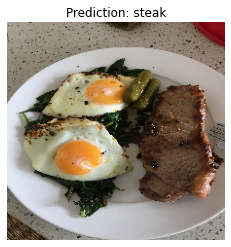

In [ ]:
# Test our model on custom image 
pred_and_plot(model_7, "03-steak.jpeg")

Our model works !!! Let's try it on another image .... Pizza this time 🍕

--2022-10-09 13:10:58--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.2’

03-pizza-dad.jpeg.2 100%[===================>]   2.74M  --.-KB/s    in 0.02s   

2022-10-09 13:10:58 (116 MB/s) - ‘03-pizza-dad.jpeg.2’ saved [2874848/2874848]



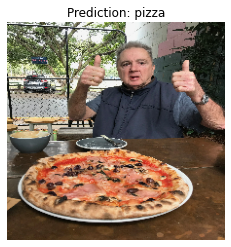

In [ ]:
# Download anothe custom image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

pred_and_plot(model_exo_2, "03-pizza-dad.jpeg")

--2022-10-09 13:13:55--  https://c7.alamy.com/comp/CY92WM/beef-steak-on-a-wooden-table-CY92WM.jpg
Resolving c7.alamy.com (c7.alamy.com)... 18.65.39.109, 18.65.39.17, 18.65.39.64, ...
Connecting to c7.alamy.com (c7.alamy.com)|18.65.39.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘beef-steak-on-a-wooden-table-CY92WM.jpg.1’

beef-steak-on-a-woo     [ <=>                ] 296.80K  --.-KB/s    in 0.02s   

Last-modified header invalid -- time-stamp ignored.
2022-10-09 13:13:55 (13.9 MB/s) - ‘beef-steak-on-a-wooden-table-CY92WM.jpg.1’ saved [303922]



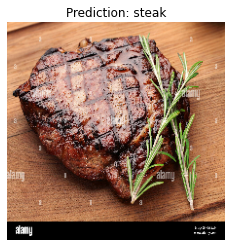

In [ ]:
!wget https://c7.alamy.com/comp/CY92WM/beef-steak-on-a-wooden-table-CY92WM.jpg

pred_and_plot(model_7, 'beef-steak-on-a-wooden-table-CY92WM.jpg')

# Multi-class Image Classification

We've just been through a bunch of the following steps with a binary problem (pizza vs. steak), now we're going to take it up a notch with 10 classes of food
(multi-class classification)

1. Become one with the data
2. Preprocess the data
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat the baseline/reduce overfitting)
7. Repeat until satisfied  

### 1. Import and become one with the data

In [1]:
import zipfile 

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# Unzip our data 
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", 'r')
zip_ref.extractall()
zip_ref.close()

--2022-10-09 21:25:38--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  90.2MB/s    in 6.9s    

2022-10-09 21:25:45 (71.6 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [19]:
import os 

# Walk through 10 classes of food image data 
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 

In [2]:
# Setup the train and test directories 
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [3]:
# Let's get the class names 
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['3716881.jpg']
Image shape: (512, 512, 3)


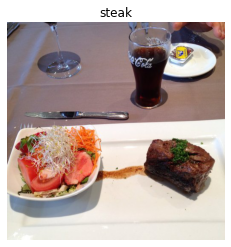

In [22]:
# Visualize, visualize, visualize 
import random 
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### 2. Preprocess the data (prepare it for a model)

In [4]:
# Create train ands test data generator and rescale the data 
from tensorflow.keras.preprocessing.image import  ImageDataGenerator

# Rescale the data 
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)
train_datagen

In [5]:
from tensorflow.python.ops.array_ops import batch_gather

# Load in our image data from directories and turn them into batches 
train_data = train_datagen.flow_from_directory(directory=train_dir,     # Target directory of images
                                               target_size=(224, 224),  # Target size of images 
                                               class_mode="categorical",     # Type of data you're working with
                                               batch_size=32)     # Size of minibatches to load data into

# valid_data = ...


test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='categorical',
                                             batch_size=32)


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)

We've been talking a lot about the CNN explainer website ...
How about we just take their model (also on 10 classes) and use it for our problem...

In [6]:
# Import the necessary libraries 
import tensorflow as tf 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [7]:
# Replicating the CNN explkainer model 

# Setting the random seed
tf.random.set_seed(42)

# Create the model (very similar to previous model but actually the same as CNN website)
model_8 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
    Activation(activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')   # changed to have 10 output neurons and use the softmax acttivation
])

# Compile the model 
model_8.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

### Fit a model 

In [8]:
# Fit the model 
history_8 = model_8.fit(train_data,  # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
 14/235 [>.............................] - ETA: 6:56 - loss: 2.3308 - accuracy: 0.1161

KeyboardInterrupt: ignored

### 5.Evaluate the model 

In [29]:
# Evaluate on the test data 
model_8.evaluate(test_data)

79/79 [==============================] - 11s 143ms/step - loss: 3.2617 - accuracy: 0.2792


[3.2616515159606934, 0.2791999876499176]

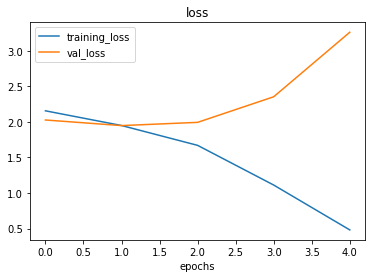

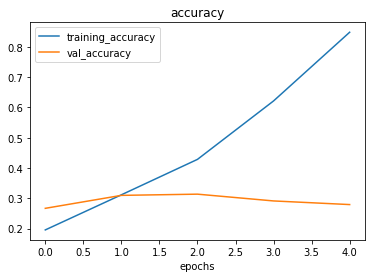

In [30]:
# Check out the model's loss curves on the 10 classes
plot_loss_curves(history_8)

What do these loss curves tell us ?

Well... It seems like our model is **overfitting** the training set quite badly... in other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test dataset 

### 6. Adjust the model hyperparameters (to beat the baseline/reduce overfitting) 

Due to its performance on the training data, it's clear our model is learning something...

However, it's not generalizing well to the unseen data (overfitting).

So, let's try and fix overfitting...

* **Get more data** - Having more data gives a model more opportunity to learn diverse patterns.
* **Simplify the model** - if our current model is overfitting the data, it may be too complicated a model, one way to simplify it is to:
reduce # of layers or reduce # of hidden unitsin layers.
* **Use data augmentation** - data augmentation manipulates the training data in such a way to add more dicersity to it (without actually altering the actual data)
* **Use transfer learning** - transfer learning leevrage the patterns another model has learned on similar data to your own and allows it to use those patterns on your dataset.

In [34]:
# How about we try and simplify the model first
# Let's try and remove 2 convolutional layers 

model_9 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_9.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [37]:
# Fit the model with 2x Conv layers removed 
history_9 = model_9.fit(train_data,
                        epochs=5, 
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 56s 235ms/step - loss: 2.1359 - accuracy: 0.2427 - val_loss: 1.9818 - val_accuracy: 0.2900
Epoch 2/5
235/235 [==============================] - 45s 190ms/step - loss: 1.7712 - accuracy: 0.3939 - val_loss: 1.9901 - val_accuracy: 0.3064
Epoch 3/5
235/235 [==============================] - 47s 202ms/step - loss: 1.4477 - accuracy: 0.5228 - val_loss: 1.9369 - val_accuracy: 0.3340
Epoch 4/5
235/235 [==============================] - 54s 229ms/step - loss: 0.9819 - accuracy: 0.6921 - val_loss: 2.2211 - val_accuracy: 0.3252
Epoch 5/5
235/235 [==============================] - 49s 210ms/step - loss: 0.5438 - accuracy: 0.8464 - val_loss: 2.6054 - val_accuracy: 0.3128


In [38]:
# Check out the loss curve of model_9
plot_loss_curves(model_9)

TypeError: ignored

In [35]:
model_9.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 29160)             0         
                                                                 
 dense_2 (Dense)             (None, 10)               

Looks like our "simplifying our model" didnn't work... the accuracy went down and overfitting continued ...

How about we try data augmentation?

### Trying to reduce overfitting with data augmentation

Let's try and improve our model's results by using augmented data...

Ideally, we want to:
* reduce overfitting (get the train and validation loss curves closer)
* Improve our model's accuracy

In [31]:
# Create ImageDataGenerator with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                          rotation_range=0.2, 
                                          shear_range=0.2,
                                          zoom_range=0.2,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          horizontal_flip=True)



In [32]:
# Import data and augment it from the training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                target_size=(224, 224),
                                                                batch_size=32,
                                                                class_mode='categorical',
                                                                shuffle=True)

Augmented training data
Found 7500 images belonging to 10 classes.


In [39]:
# Let's create another model and fit it with augmented data

model_10 = tf.keras.models.clone_model(model_8)

# Compile the cloned model (using the same setup as previous model)
model_10.compile(loss='categorical_crossentropy',
                 optimizer=Adam(),
                 metrics=['accuracy'])

In [40]:
# Fit the model 
history_10 = model_10.fit(train_data_augmented,
                          epochs=5, 
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 128s 544ms/step - loss: 2.2583 - accuracy: 0.1524 - val_loss: 2.1388 - val_accuracy: 0.2292
Epoch 2/5
235/235 [==============================] - 125s 533ms/step - loss: 2.1007 - accuracy: 0.2475 - val_loss: 1.9037 - val_accuracy: 0.3264
Epoch 3/5
235/235 [==============================] - 125s 530ms/step - loss: 2.0149 - accuracy: 0.2929 - val_loss: 1.9270 - val_accuracy: 0.3440
Epoch 4/5
235/235 [==============================] - 127s 542ms/step - loss: 1.9827 - accuracy: 0.3156 - val_loss: 1.8540 - val_accuracy: 0.3680
Epoch 5/5
235/235 [==============================] - 137s 582ms/step - loss: 1.9527 - accuracy: 0.3296 - val_loss: 1.8318 - val_accuracy: 0.3704


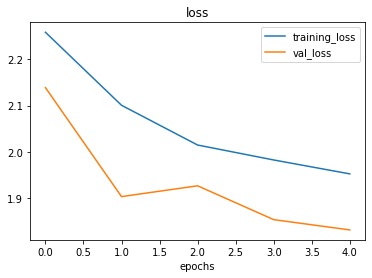

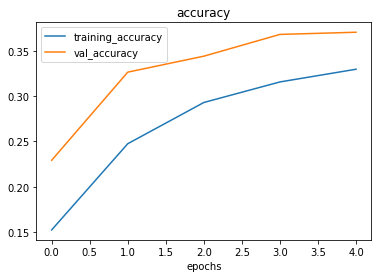

In [41]:
# Check out our model trained on augmented data's loss curves 
plot_loss_curves(history_10)

Woah! That looks much better, the loss curves are much closer to each other than the baseline model and they look like they're heading in the right direction (certainly not the wrong direction) so if we were to train for longer, we might see further improvements.

### 7. Repeat until satisfied

We could keep going here... continually trying to bring our loss curves together and trying  to improve the validation/test accuracy.

How?

By running lots of experiments, namely:
* restructuring our model's architecture (increasing layers/hidden units)
* adjust the learning rate 
* try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)
* training for longer (e.g. 10 epochs instead of 5)
* try transfer learning

### Make predictions based on our trained model 

Let's use our trained model to make some predictions 

In [42]:
# Remind ourseleves of the class names our model trained on
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [43]:
# Download some custom images 
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

--2022-10-09 21:04:55--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.01s   

2022-10-09 21:04:55 (195 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]

--2022-10-09 21:04:55--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 

In [45]:
# Reconfig pred_and_plot function to work with multi-class 

def pred_and_plot(model, filename, class_names=class_names):
  """
  Import an image located at filename, makes a prediction with the model and 
  plots the image with the predicted class as the title
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for multi-class & get class names 
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred))]


  # Plot the image and predicted class 
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

Looks like our model didn't perform too well on, our custom images but this because it only achieved ~39% accuracy on the test data. So we can expect it to function quite poorly on other unseen data.

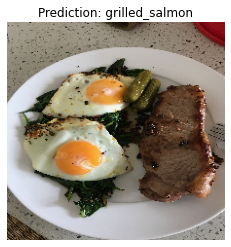

In [52]:
# Good news: our pred_and_plot function works on bnary classification too 
pred_and_plot(model=model_10,
              filename='03-steak.jpeg',
              class_names=['pizza', 'steak'])


## Saving and moading our model 

In [53]:
# Save a model 
model_10.save("saved_trained_model_10")

In [ ]:
# Load in a trained model and evaluate it 
loaded_model_10 = tf.keras.models.load_models('saved_model_10')
loaded_model_10.evaluate(test_data)

In [ ]:
# Compare our loaded model to our ecisting model
model_10.evaluate(test_data)